# Gene Expressions for different types of tumor
<div style="text-align: center;">
    <img src="images/gene_protein_cancer.jpg" alt="image" width="300" height="200">
</div>
[image src: https://www.cancer.gov/about-cancer/causes-prevention/genetics]

This project aims to identify different gene expressions associated to 5 types of tumor : 
- BRCA (Breast Cancer): Family of Genes (BRCA1 and BRCA2) are known as tumor suppresors. But mutation in these genes cause cancer.
- KIRC (Kidney Renal Clear Cell Carcinoma): 
- COAD (Colon Adenocarcinoma)
- LUAD (Lung Adenocarcinoma)
- PRAD (Prostate Adenocarcinoma)

The dataset is sourced from https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq.
The original dataset is published at https://www.synapse.org/Synapse:syn300013/discussion/threadId=5455. The Gene names in the dataset are dummy names. The actual gene names are at https://www.ncbi.nlm.nih.gov/gene, per this discussion thread https://www.synapse.org/Synapse:syn300013/discussion/threadId=5455. 

In [3]:
import warnings

warnings.filterwarnings("ignore")
DATA_ANALYSIS_DIR = "data-analysis/"

## Data Loading


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from src.utils.ArrayUtils import get_list_of_items_in_both_lists


In [5]:
# read the data from files
url_reconstructed = 'TCGA-PANCAN-HiSeq-801x20531/data.csv'

# url = 'https://drive.google.com/file/d/1VXyhDXpYT8G2Buhkc6kBjw93CLG1y1f0/view?usp=drive_link'
# # Use only the Id and reconstruct the URL
# url_reconstructed = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url_reconstructed)
tumor_df = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv')
df

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [7]:
print(f"Dataframe before adding the class column: {df.info()}")
print(f"Total # of columns: {len(df.columns)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB
Dataframe before adding the class column: None
Total # of columns: 20532


In [8]:
# Copy over the Class column into the main dataframe
df = df.rename(columns={'Unnamed: 0': 'sample'})
tumor_df = tumor_df.rename(columns={'Unnamed: 0': 'sample'})
df['Class'] = np.where( (df['sample'] == tumor_df['sample']), tumor_df['Class'], df['sample'])

# df['Class'] = tumor_df['Class']
# print(f"Total # of columns: {len(df.columns)}")

df.drop(columns=['sample'], axis=1, inplace=True)

df.head()


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


## Exploratory Data Analysis (EDA)
### Data Cleaning and PreProcessing

Data : 
- No NANs as stated on the data source page


In [9]:
df.isnull().any().any()

np.False_

In [10]:
# Find columns with 0 values
zero_cols = df.columns[(df == 0).all()]
print(f"# of columns with all 0s in them : {zero_cols}")
df = df.drop(columns=zero_cols, axis=1)
print(f"# of columns with all 0s in them : {df.columns[(df == 0).all()]}")

# of columns with all 0s in them : Index(['gene_5', 'gene_23', 'gene_4370', 'gene_4808', 'gene_4809', 'gene_4814',
       'gene_4816', 'gene_4817', 'gene_4831', 'gene_5288',
       ...
       'gene_18908', 'gene_18909', 'gene_18910', 'gene_18911', 'gene_18914',
       'gene_18915', 'gene_19450', 'gene_19451', 'gene_19452', 'gene_19671'],
      dtype='object', length=267)
# of columns with all 0s in them : Index([], dtype='object')


In [11]:
# Post cleanup, write the data to file
df.to_csv(DATA_ANALYSIS_DIR + "df_PostColumnCleanup.csv")


In [12]:
# Class analysis
class_unique_vals = df['Class'].unique()
assert(len(class_unique_vals) == 5)

# print the distribution
print(f"Distribution of Class values: \n{df['Class'].value_counts()}")


Distribution of Class values: 
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [13]:
# Split -
X = df.drop(columns=['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Class'])


### Univariate and Multivariate Analysis
Given the large # of variables (columns), charting each out against other can be a challenge. Hence printing key insights such as stats to file.

In [14]:
from scipy import stats

df_desc = df.describe()
df_desc_t = df_desc.T
df_desc_t.to_csv(DATA_ANALYSIS_DIR + "df_describe.csv")

df_desc_zscore = df_desc.apply(stats.zscore)
df_desc_zscore.T.to_csv(DATA_ANALYSIS_DIR + "rawdata_zscore.csv")
# df_desc['upperbound'] = df_desc['mean'] + 3*(df_desc['std'])
# df_desc['lowerbound'] = df_desc['mean'] - 3*(df_desc['std'])


###### Identify Correlation across features / columns

In [24]:
# --- NOTE : This take quite some time to run 11+ mins
corr_df = X.corr()
corr_df.to_csv(DATA_ANALYSIS_DIR + 'features_corr_matrix.csv')


In [25]:
# Are there any Features with Correlation value= NaN ?
# -- In total there are 267 cols with 0 values, since they are deleted, result is zero
corr_nan_list = corr_df.columns[corr_df.isna().all()].tolist()
print(corr_nan_list)
corr_df.head()

[]


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
gene_0,1.000000,0.024111,0.027117,-0.080269,-0.028969,0.051855,-0.053647,-0.024423,-0.012785,-0.015423,...,-0.021109,-0.064341,-0.013874,-0.008384,-0.036623,0.034314,-0.000368,-0.049142,0.041554,-0.027767
gene_1,0.024111,1.000000,0.533902,0.148348,-0.158555,0.202855,0.177154,0.023411,0.006425,-0.022650,...,0.169172,0.190145,0.313725,-0.007284,0.123178,-0.255093,0.303771,0.247959,-0.067474,0.034348
gene_2,0.027117,0.533902,1.000000,0.075988,-0.125376,0.334900,0.136246,0.013228,-0.045725,0.011893,...,-0.021067,0.036411,0.242255,0.018755,-0.054584,-0.160446,0.163181,0.066709,0.011765,0.075604
gene_3,-0.080269,0.148348,0.075988,1.000000,0.153666,-0.007905,-0.084841,-0.033180,0.002434,-0.030119,...,-0.186729,-0.014547,-0.011733,-0.242855,-0.240551,0.092787,-0.000379,0.016733,-0.135829,0.023476
gene_4,-0.028969,-0.158555,-0.125376,0.153666,1.000000,-0.044347,-0.156698,0.082124,0.098267,-0.042986,...,-0.499208,-0.167764,-0.283480,0.179406,-0.367551,0.011739,-0.434604,-0.108036,-0.007229,0.062752


### Feature Selection


### Dimensionality Reduction

In [ ]:
# Here we run without reducing any dimensions, i.e directly on all of the data.



#### Check Point EDA : Observations thus far
- Data is clean
- Some of the columns have 0 values, which means


## Modeling

#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import plotly.graph_objects as go
from plotly.subplots import make_subplots




In [17]:
# --- Use basic model
rd_classifier = RandomForestClassifier(random_state=42, oob_score=True)
rd_classifier.fit(X_train, y_train)
rd_preds = rd_classifier.predict(X_test)
report = classification_report(y_test, rd_preds)
rd_preds_prob = rd_classifier.predict_proba(X_test)

rd_oob_score = rd_classifier.oob_score_
rd_feature_imp = rd_classifier.feature_importances_



##### Model Evaluation

In [22]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(conf_matrix, labels, title="Confusion Matrix"):

    conf_matrix = conf_matrix[::-1]
    # labels = labels[::-1]

    #heat map
    fig = go.Figure(data=go.Heatmap(
        z=conf_matrix,
        x=labels,
        y=labels[::-1], #reverse the order to align labels with way Conf matrix is output
        colorscale='Rainbow', # 'Hot', # 'YlOrRd', # 'YlGnBu', #'Viridis',
        texttemplate="%{z}",
        textfont={"size": 10}
    ))

    fig.update_layout(
        title_text = title,
        xaxis_title="Predicted Class",
        yaxis_title="Actual Class",
        # xaxis={'side': 'top'},
        # yaxis={'autorange': 'reversed'},
        width=500,
        height=500,
    )

    fig.show()

In [24]:
# - interpreting Results
print(f"Out of Bag score: {rd_oob_score}")
print(f"Feature Importances: {rd_feature_imp.sort()}")
print(f"Accuracy : {rd_classifier.score(X_test, y_test)}")
print("Classification report: \n", report)

cm = confusion_matrix(y_true=y_test, y_pred=rd_preds, labels=class_unique_vals)
plot_confusion_matrix(cm, labels=class_unique_vals, title='RandomForest without PCA : Confusion Matrix')


Out of Bag score: 0.996875
Feature Importances: None
Accuracy : 0.9937888198757764
Classification report: 
               precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.96      0.98        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



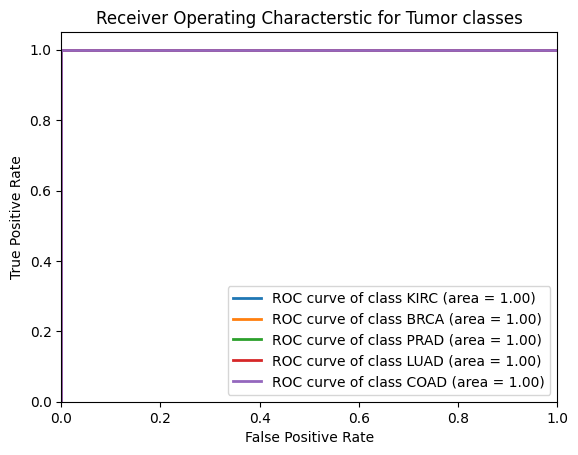

In [30]:
# Area under Curve - REF : https://www.geeksforgeeks.org/interpreting-random-forest-classification-results/
target_vals = y_test.unique()
# y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4])
label_binzer = LabelBinarizer()
label_binzer.fit(y_test)
y_test_bin = label_binzer.transform(y_test)
# print(y_test_bin)
fpr = dict()
tpr = dict()
roc_auc = dict()

# print(f"y_test_bin : {len(y_test_bin[:, 0])}")
# print(f"rd_preds_prob : {rd_preds_prob[:, 0]}")
# print(f"y_test_bin : {len(y_test_bin[:, 1])}")
# print(f"rd_preds_prob : {rd_preds_prob[:, 1]}")


for index in range(len(target_vals)):
    fpr[index], tpr[index], _ = roc_curve(y_test_bin[:, index], rd_preds_prob[:, index])
    # print(f"FPR at {index}: \n{fpr[index]}")
    # print(f"TPR at {index}: \n{tpr[index]}")
    roc_auc[index] = auc(fpr[index], tpr[index])

# Plot ROC curve
plt.figure()
for index in range(len(target_vals)) :
    plt.plot(fpr[index], tpr[index], lw=2, label=f"ROC curve of class {target_vals[index]} (area = {roc_auc[index]:.2f})")

# plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic for Tumor classes')
plt.legend(loc="lower right")
plt.show()

